In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')
print('-'*25)

-------------------------


In [2]:
#load training and test set
train = pd.read_csv("train.csv")

In [3]:
train.shape

(188318, 132)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [5]:
#Create Independent and dependent variables
x = train.drop(['loss'], axis = 1)
y = train['loss']

In [6]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [7]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [8]:
train.describe().columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'loss'],
      dtype='object')

In [9]:
train.isnull()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188314,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188315,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188316,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


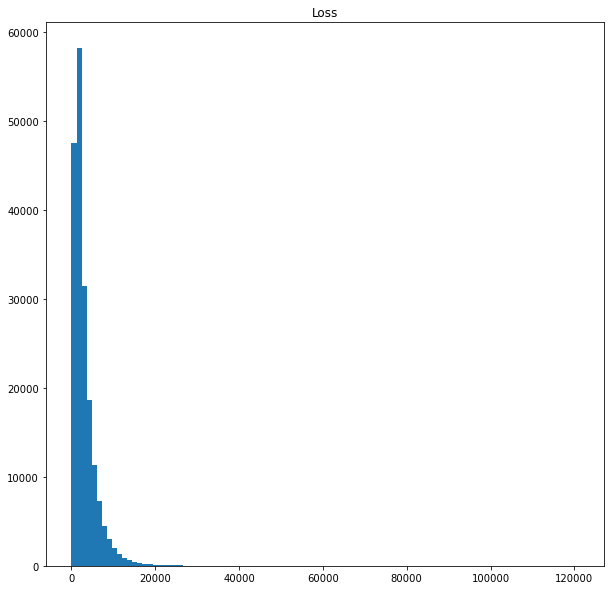

In [10]:
plt.figure(figsize=(10,10))
plt.hist(train.loss, bins=100)
plt.title("Loss")
plt.show()

In [11]:
print('Before transformation \n')
print('Loss Skewness ',train['loss'].skew())
print('Loss Kurtosis ',train['loss'].kurt())

Before transformation 

Loss Skewness  3.7949583775378604
Loss Kurtosis  48.07956782541841


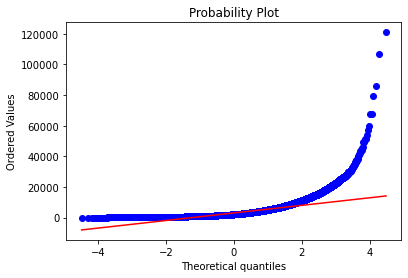

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
st.probplot(train['loss'], dist = st.norm, plot = ax)
plt.show()

In [13]:
# log transform the label variable
train['loss'] = np.log1p(train['loss'])

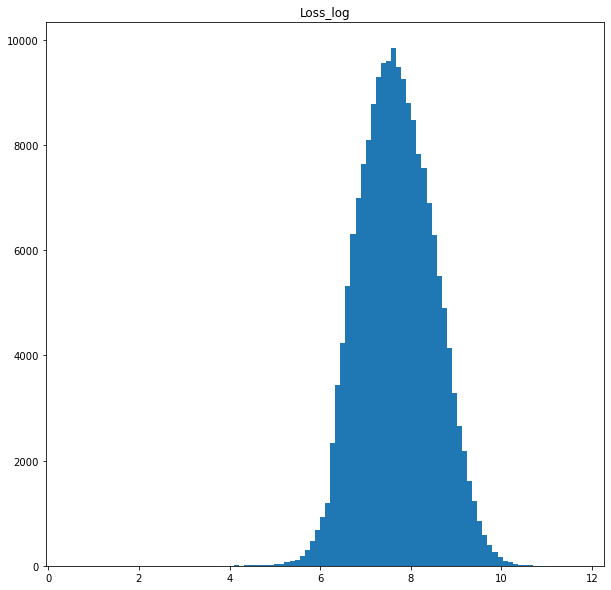

In [14]:
plt.figure(figsize=(10,10))
plt.hist(train.loss, bins=100)
plt.title("Loss_log")
plt.show()

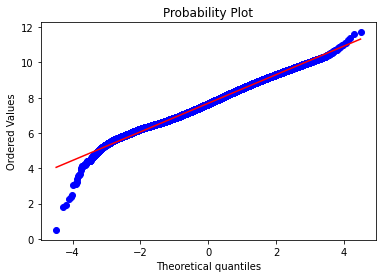

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
st.probplot(train['loss'], dist = st.norm, plot = ax)
plt.show()

In [16]:
print('After transformation \n')
print('Loss Skewness ',train['loss'].skew())
print('Loss Kurtosis ',train['loss'].kurt())

After transformation 

Loss Skewness  0.0966195895031505
Loss Kurtosis  -0.1414701836800938


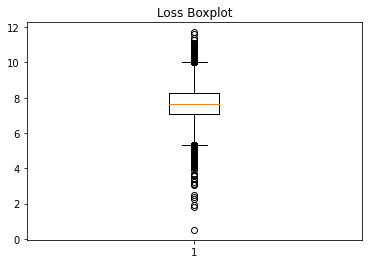

In [17]:
plt.boxplot(train['loss'])
plt.title('Loss Boxplot')
plt.show()

In [18]:
#Create numeric dataframe
numcols=[]
for col in train.columns:
    if col.startswith('cont'):
        numcols.append(col)

In [19]:
#Create categorical dataframe
catcols=[]
for col in train.columns:
    if col.startswith('cat'):
        catcols.append(col)

In [20]:
print("Number of Numerical features: ", len(numcols))

print("Number of Categorical features: ", len(catcols))

Number of Numerical features:  14
Number of Categorical features:  116


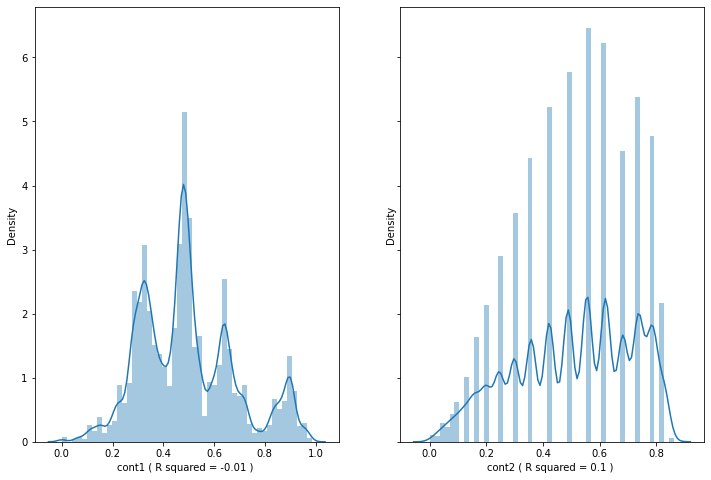

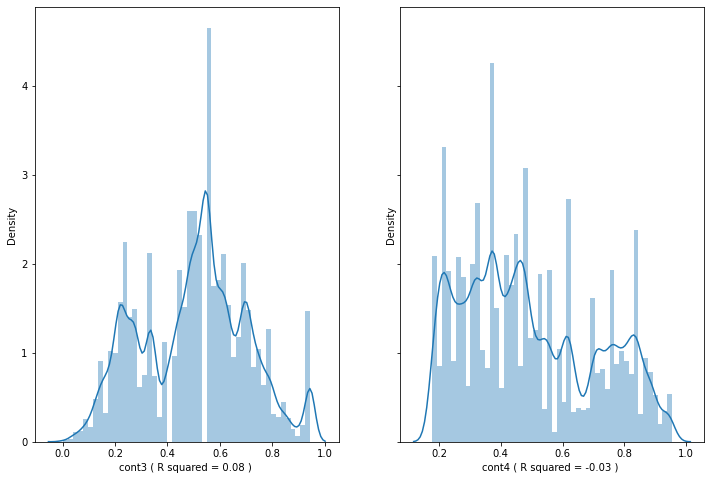

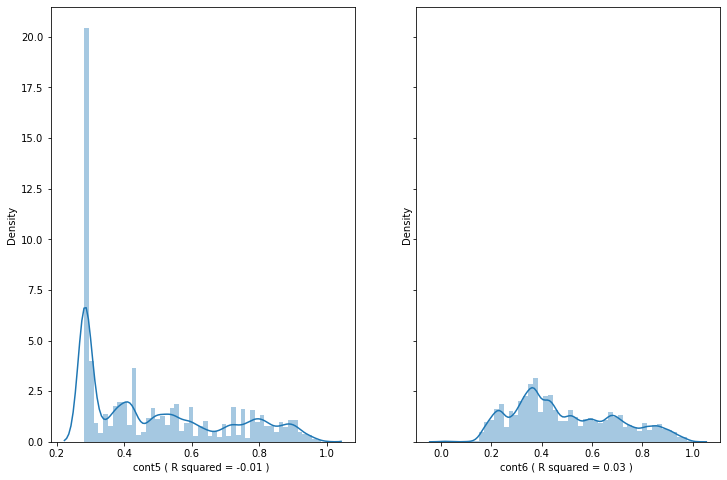

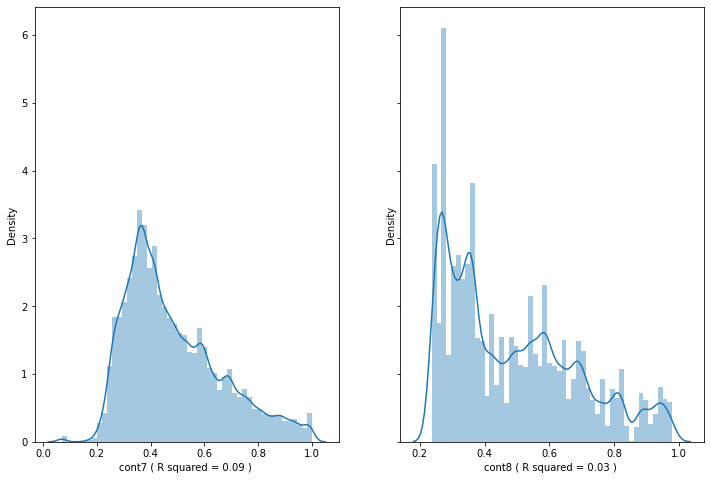

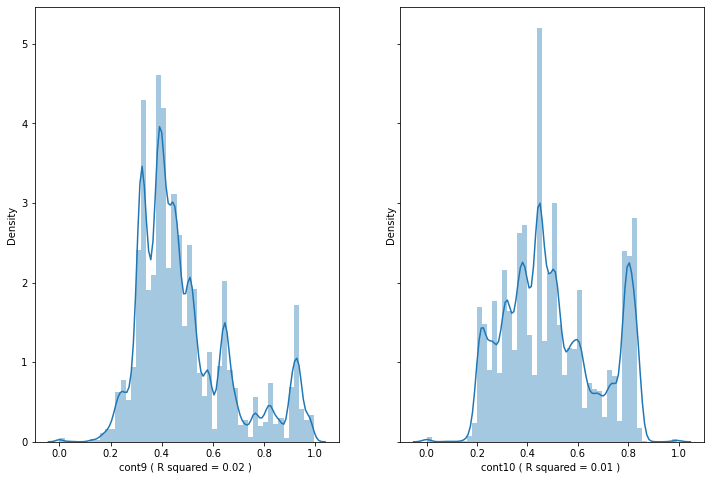

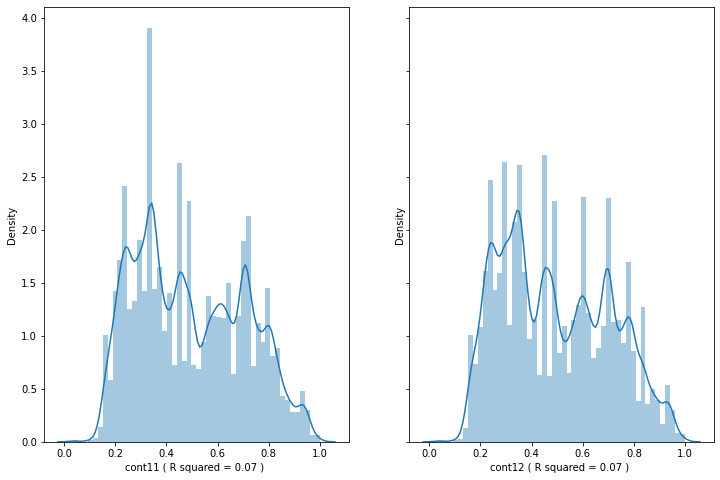

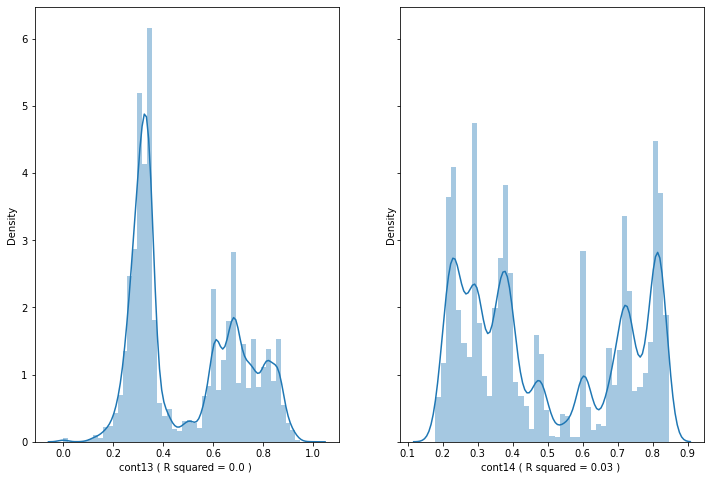

In [21]:
#Visualize numerical histograms
ncol = 2
nrow = 7

for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(12, 8))
    cols = numcols[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        sns.distplot(train[cols[i]], ax=axs[i])
        xlabel=cols[i]+" ( R squared = "+str(round(np.corrcoef(train.loss, train[cols[i]])[0, 1],2))+" ) "
        axs[i].set(xlabel=xlabel, ylabel='Density')

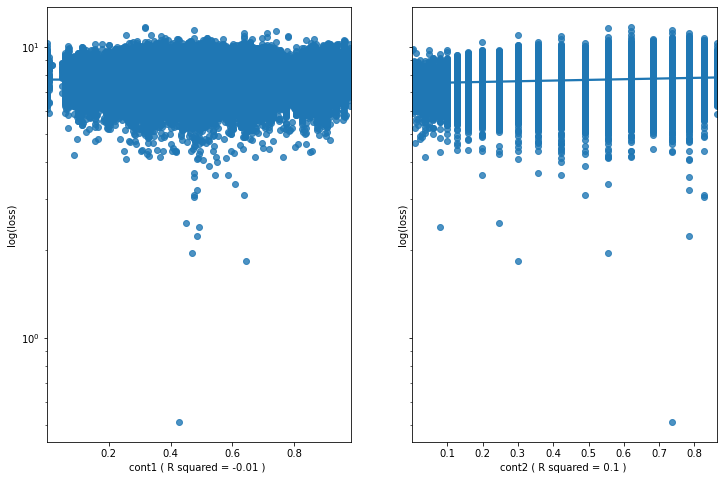

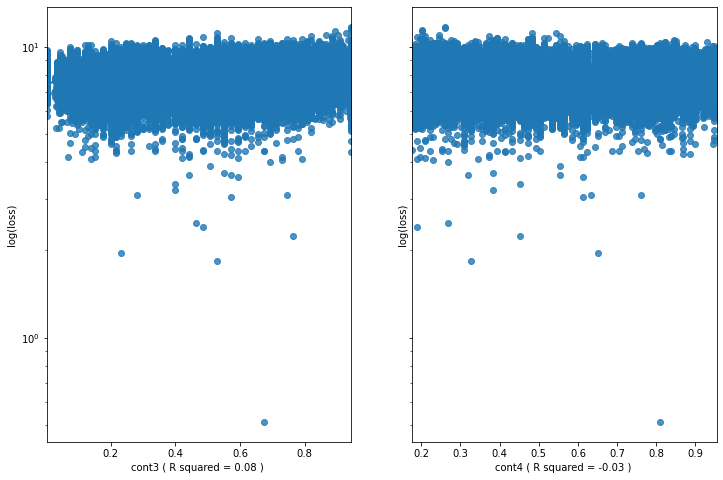

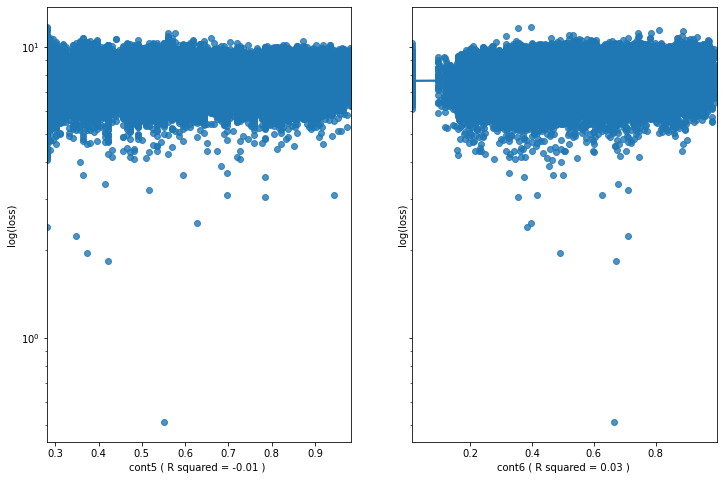

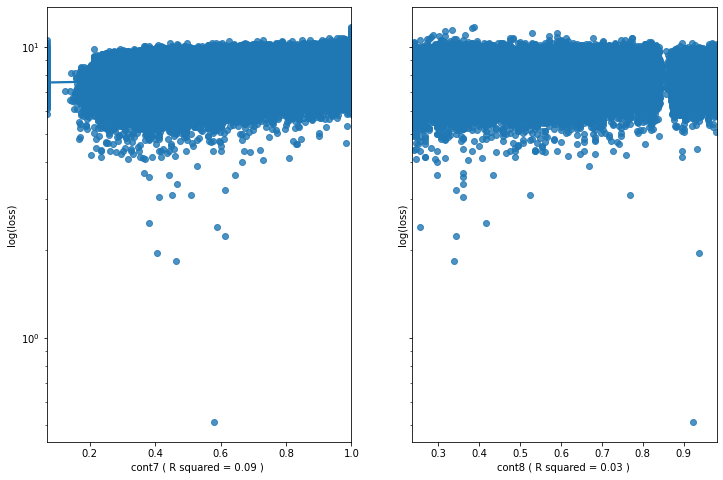

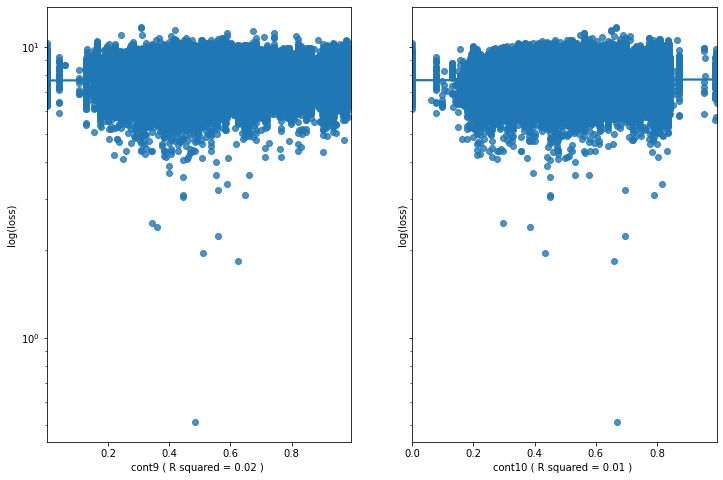

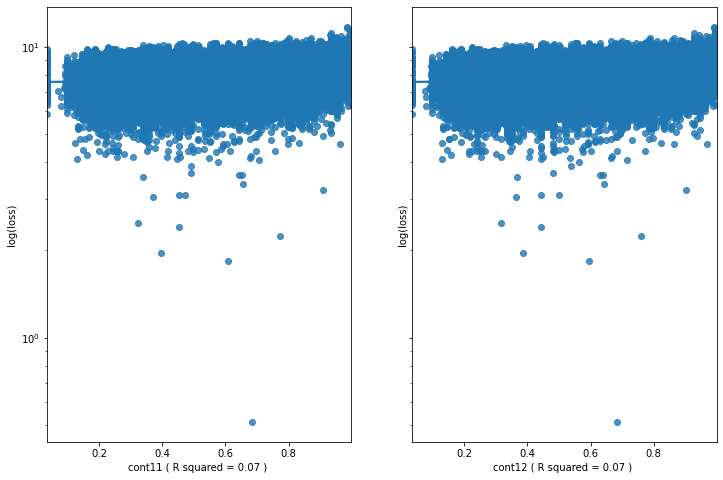

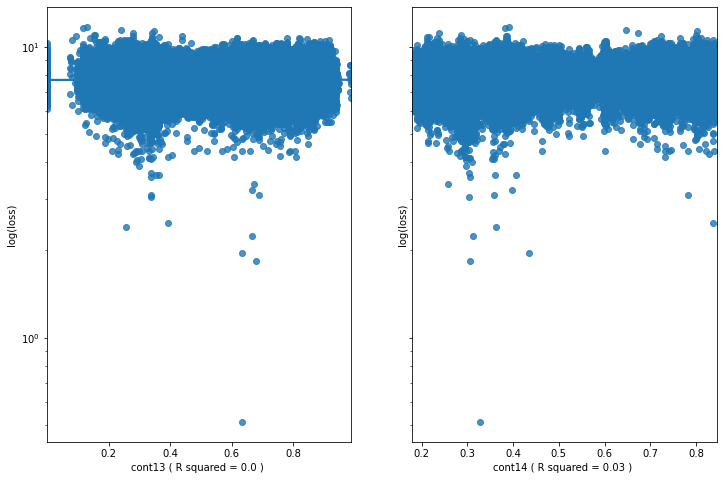

In [22]:
#Scatterplots for numerical data
for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(12, 8))
    cols = numcols[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        axs[i].set(yscale="log")
        sns.regplot(x=cols[i], y="loss", data=train, ax=axs[i])
        xlabel=cols[i]+" ( R squared = "+str(round(np.corrcoef(train.loss, train[cols[i]])[0, 1],2))+" ) "
        axs[i].set(xlabel=xlabel, ylabel='log(loss)')

In [23]:
df_num = train[numcols]
df_num['loss'] = train['loss']
num_corr = df_num.corr()
df_num.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,7.702637
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,7.158203
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,8.008396
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,6.846784
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,7.924742


In [24]:
#Count null values in numerical data
null_counts = df_num.isnull().sum()
null_counts[null_counts > 0]
df_num.isnull().any().all()

False

In [25]:
df_num.var()

cont1     0.035209
cont2     0.042933
cont3     0.040846
cont4     0.044644
cont5     0.043692
cont6     0.042137
cont7     0.031844
cont8     0.039749
cont9     0.033000
cont10    0.034550
cont11    0.043989
cont12    0.043860
cont13    0.045274
cont14    0.049501
loss      0.658223
dtype: float64

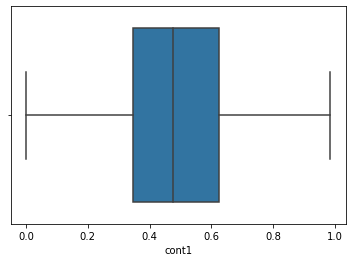

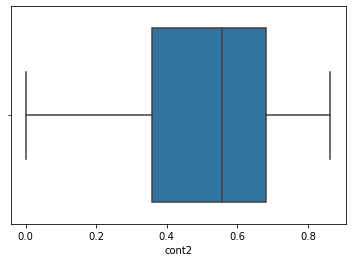

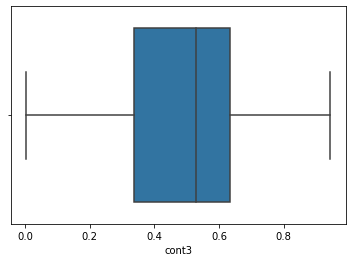

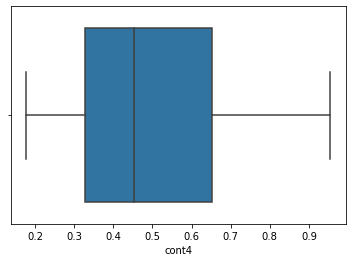

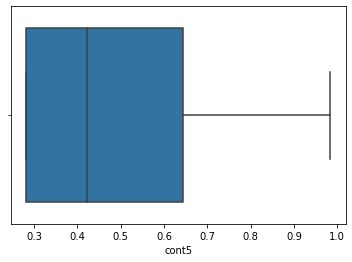

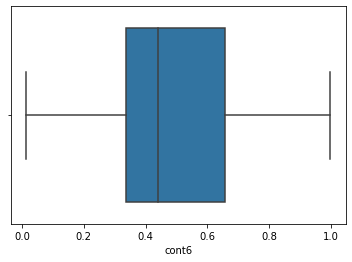

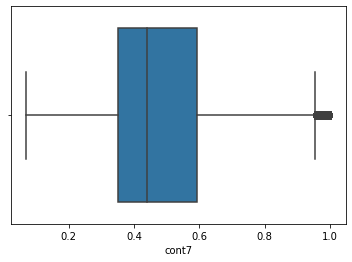

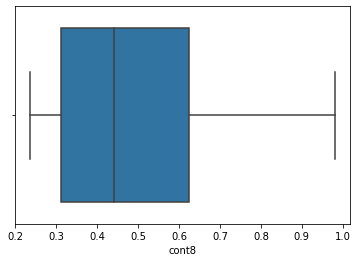

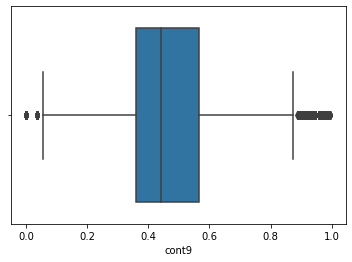

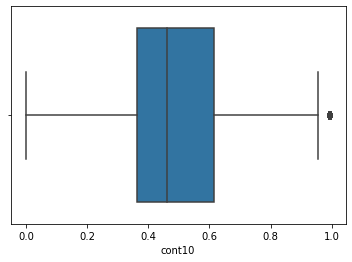

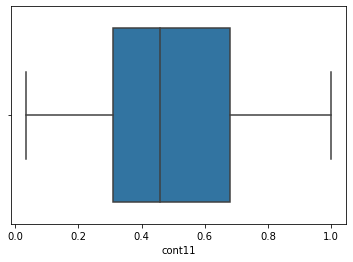

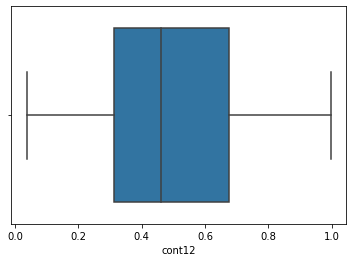

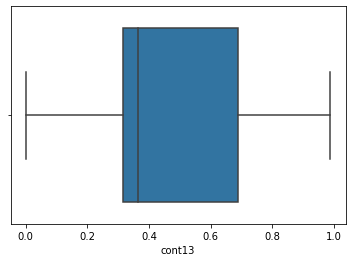

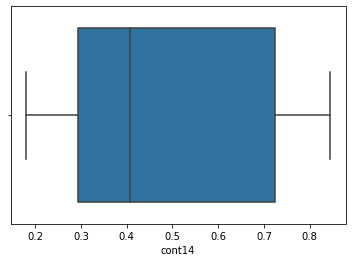

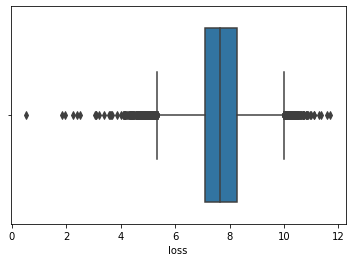

In [26]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

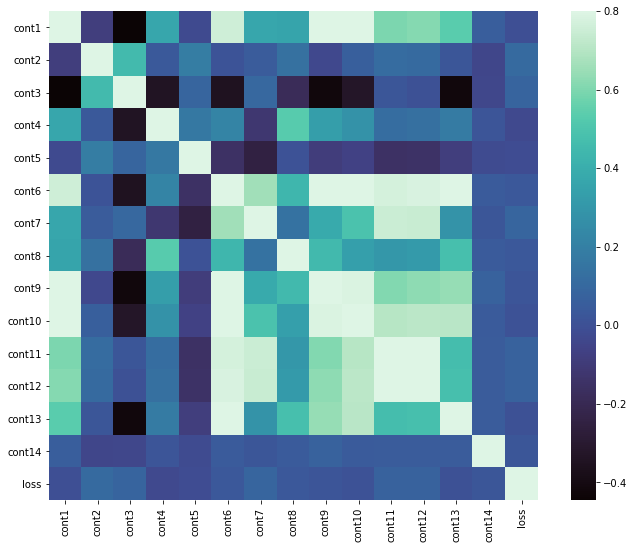

In [27]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(num_corr, vmax=.8, square=True, cmap="mako")

In [28]:
#Count null values in categorical data
df_cat = train[catcols]
nulls_counts = df_cat.isnull().sum()
nulls_counts[nulls_counts >0]
df_cat.isnull().any().all()

False

In [29]:
print(train[catcols].apply(pd.Series.nunique))

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
         ... 
cat112     51
cat113     61
cat114     19
cat115     23
cat116    326
Length: 116, dtype: int64


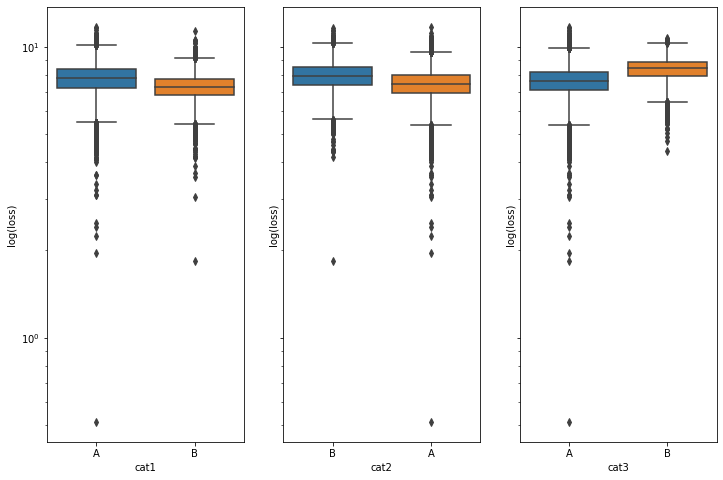

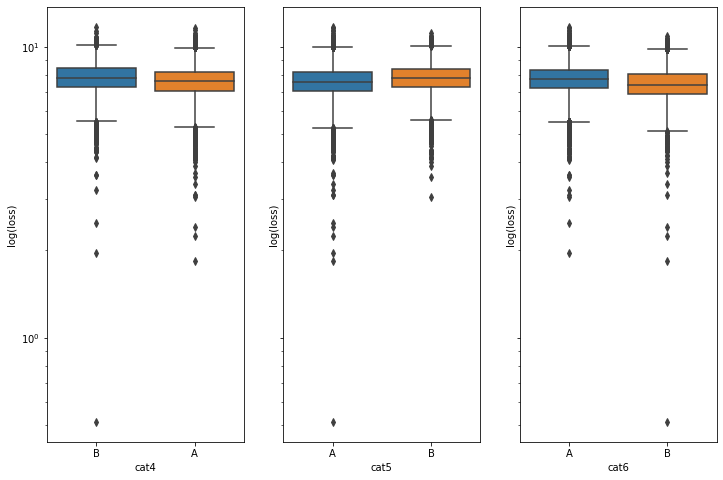

In [30]:
#Create a box plot to compare the categorical data
ncol = 3
nrow = 2

for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(12, 8))
    cols = catcols[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        axs[i].set(yscale="log")
        sns.boxplot(x=cols[i], y="loss", data=train, ax=axs[i])
        axs[i].set(xlabel=cols[i], ylabel='log(loss)')

In [31]:
#label and encode categorical variables
cat_le = df_cat.apply(LabelEncoder().fit_transform)
cat_le.var()

cat1         0.186671
cat2         0.245552
cat3         0.051822
cat4         0.216950
cat5         0.225332
             ...     
cat112     167.851755
cat113     376.056858
cat114       7.152023
cat115       6.056245
cat116    5470.294728
Length: 116, dtype: float64

In [32]:
num_corr.sort_values(['loss'], ascending = False, inplace = True)
num_corr.loss

loss      1.000000
cont2     0.104666
cont7     0.085095
cont3     0.081548
cont11    0.072760
cont12    0.072266
cont8     0.032042
cont6     0.031517
cont14    0.025948
cont9     0.017417
cont10    0.010604
cont13    0.003276
cont1    -0.007335
cont5    -0.014958
cont4    -0.027523
Name: loss, dtype: float64

In [33]:
#Add Sale Price for correlation
cat_le['loss'] = train['loss']

#find important features in categorical variables
cat_corr = cat_le.corr()
cat_corr.sort_values(['loss'], ascending = False, inplace = True)
cat_corr.loss

loss      1.000000
cat79     0.402343
cat101    0.378450
cat12     0.336546
cat87     0.324863
            ...   
cat6     -0.167371
cat73    -0.180490
cat1     -0.265138
cat81    -0.272260
cat80    -0.474878
Name: loss, Length: 117, dtype: float64

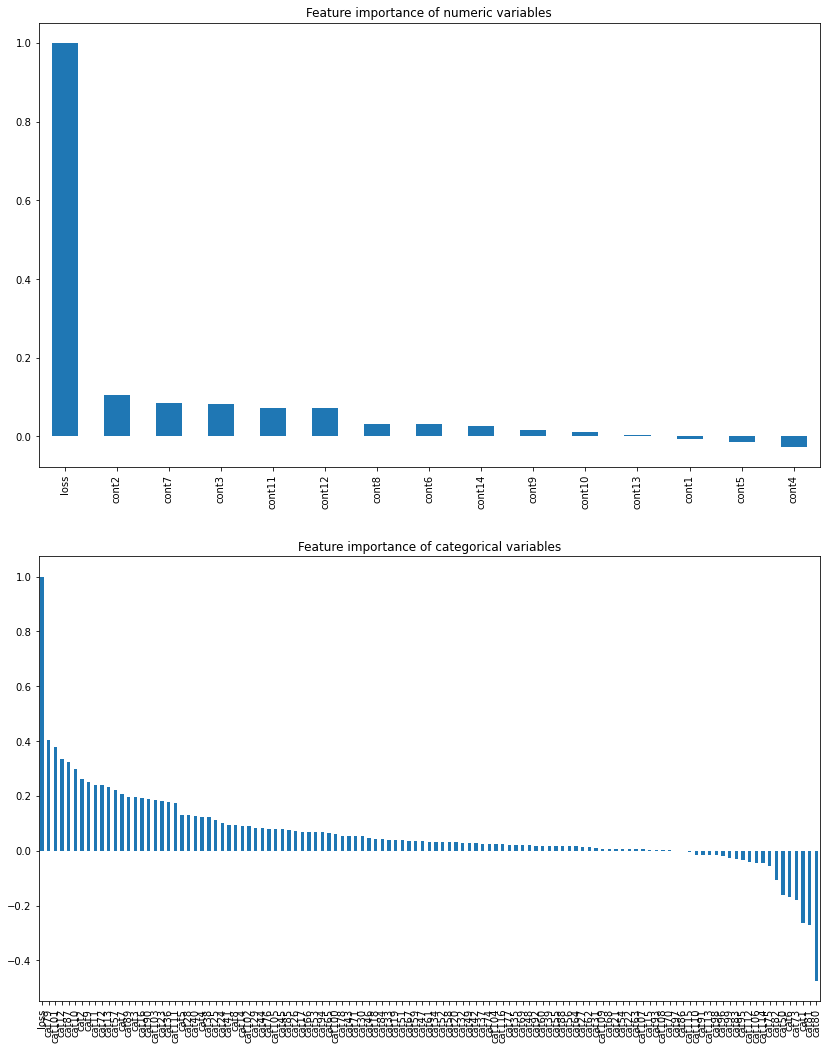

In [34]:
#Visualize variable importance
fig, axarr = plt.subplots(2, 1, figsize = (14, 18))
num_corr.loss.plot.bar(ax=axarr[0])
cat_corr.loss.plot.bar(ax=axarr[1])
axarr[0].set_title("Feature importance of numeric variables")
axarr[1].set_title("Feature importance of categorical variables");

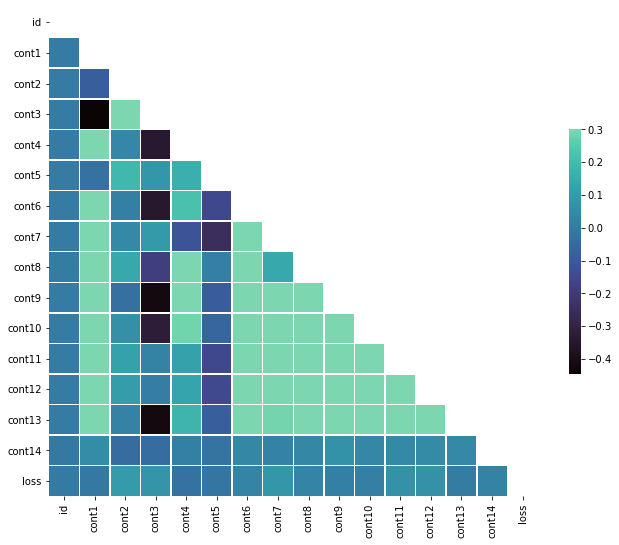

In [35]:
#Visualize Correlations
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap="mako", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [36]:
# Determine less important features
less_important_num = num_corr[num_corr['loss'].abs() < .02].index
less_important_cat = cat_corr[cat_corr['loss'].abs() < .02].index

In [37]:
df_num.drop(less_important_num, axis = 1, inplace = True)

df_cat.drop(less_important_cat, axis = 1, inplace = True)

In [38]:
# list of less important features
less_important = less_important_num.union(less_important_cat)
#drop less important features
train.drop(less_important, axis = 1, inplace = True)

In [39]:
print("Number of Numerical features: ", len(df_num.columns))

print("Number of Categorical features: ", len(df_cat.columns))

Number of Numerical features:  10
Number of Categorical features:  87


In [40]:
train.isnull().any().all()

False

In [41]:
train.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat16', 'cat17',
       'cat18', 'cat19', 'cat20', 'cat23', 'cat24', 'cat25', 'cat26', 'cat28',
       'cat29', 'cat30', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37',
       'cat38', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46',
       'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat57',
       'cat58', 'cat59', 'cat61', 'cat65', 'cat66', 'cat67', 'cat69', 'cat71',
       'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79',
       'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat87', 'cat89',
       'cat90', 'cat94', 'cat95', 'cat99', 'cat100', 'cat101', 'cat102',
       'cat103', 'cat104', 'cat105', 'cat106', 'cat111', 'cat112', 'cat114',
       'cat116', 'cont2', 'cont3', 'cont4', 'cont6', 'cont7', 'cont8',
       'cont11', 'cont12', 'cont14', 'loss'],
      dtype='object')

for i in df_num.columns:
    print(i,' ',
          'Skewness: {:05.2f}'.format(train[i].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[i].kurt())  
         )

In [42]:
#Encode the categorical variables
qualitative = df_cat.columns

train[qualitative] = train[qualitative].apply(LabelEncoder().fit_transform)

In [43]:
for i in df_cat.columns:
    print(i,' ',
          'Skewness: {:05.2f}'.format(train[i].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[i].kurt())  
         )

cat1   Skewness: 01.16     Kurtosis: -00.64
cat2   Skewness: 00.27     Kurtosis: -01.93
cat3   Skewness: 03.91     Kurtosis: 013.30
cat4   Skewness: 00.78     Kurtosis: -01.39
cat5   Skewness: 00.66     Kurtosis: -01.56
cat6   Skewness: 00.87     Kurtosis: -01.24
cat7   Skewness: 06.18     Kurtosis: 036.20
cat8   Skewness: 03.76     Kurtosis: 012.11
cat9   Skewness: 00.41     Kurtosis: -01.83
cat10   Skewness: 01.97     Kurtosis: 001.88
cat11   Skewness: 02.54     Kurtosis: 004.47
cat12   Skewness: 01.95     Kurtosis: 001.79
cat13   Skewness: 02.61     Kurtosis: 004.79
cat14   Skewness: 08.93     Kurtosis: 077.72
cat16   Skewness: 05.11     Kurtosis: 024.12
cat17   Skewness: 11.87     Kurtosis: 138.87
cat18   Skewness: 13.70     Kurtosis: 185.81
cat19   Skewness: 10.06     Kurtosis: 099.17
cat20   Skewness: 30.33     Kurtosis: 918.15
cat23   Skewness: 01.82     Kurtosis: 001.30
cat24   Skewness: 05.17     Kurtosis: 024.73
cat25   Skewness: 02.71     Kurtosis: 005.37
cat26   Skewness: 0

In [44]:
#Re-intialize Independent and dependent variables
x = train.drop(['loss'], axis = 1)
y = train['loss']

In [45]:
skewed = train.skew().abs() 
values = skewed[skewed >1]

In [46]:
#Determine features to transform
feature_transformation = values.index
feature_transformation

Index(['cat1', 'cat3', 'cat7', 'cat8', 'cat10', 'cat11', 'cat12', 'cat13',
       'cat14', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat23', 'cat24',
       'cat25', 'cat26', 'cat28', 'cat29', 'cat30', 'cat32', 'cat33', 'cat34',
       'cat35', 'cat36', 'cat37', 'cat38', 'cat40', 'cat41', 'cat42', 'cat43',
       'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51',
       'cat52', 'cat53', 'cat57', 'cat58', 'cat59', 'cat61', 'cat65', 'cat66',
       'cat67', 'cat69', 'cat71', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77',
       'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85',
       'cat87', 'cat89', 'cat90', 'cat99', 'cat101', 'cat102', 'cat103',
       'cat105', 'cat111', 'cat114'],
      dtype='object')

In [47]:
#Scale and clean the remaining variables
def transform(feature):
    train[feature] = np.log1p(train[feature])
    
transform(feature_transformation)

In [48]:
#Find outliers determined by z score
z = np.abs(st.zscore(train['loss']))
outliers = np.where(z > 3)
outliers

(array([    89,    713,    867,   1015,   2161,   2535,   2657,   3182,
          3225,   3662,   4305,   4545,   5258,   6735,   6809,   7764,
          8080,   8215,   8526,   8628,   8823,   9420,   9921,  10331,
         10684,  10718,  11271,  11813,  12133,  12314,  13030,  13066,
         14010,  14145,  14578,  14969,  15984,  16833,  17256,  17262,
         21604,  21685,  22045,  22164,  23693,  24764,  25215,  25319,
         25336,  25810,  28000,  29303,  29521,  29669,  30536,  31613,
         31690,  32119,  32881,  33126,  33175,  33378,  33428,  33661,
         33937,  34011,  34175,  34989,  35050,  35107,  35164,  35201,
         35202,  35673,  35736,  37627,  37895,  39309,  40351,  41287,
         41382,  41987,  43050,  43087,  43172,  43809,  43916,  44732,
         45631,  46307,  47687,  48107,  48369,  48539,  48920,  49280,
         49339,  49516,  49554,  49616,  50282,  50502,  50609,  50648,
         51078,  51662,  51671,  52603,  53322,  53329,  53347, 

In [49]:
#Remove outliers from dependent and independent variable
x = x.drop(x.index[outliers])
y = y.drop(y.index[outliers])

In [50]:
x.shape, y.shape

((187954, 97), (187954,))

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 40)

In [52]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
#Clean NaN values created from the scaler
x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_test [np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])